In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

1. Data Acquisition: Download the dataset from the provided link and load it into your preferred data analysis tool


In [2]:
#Task 1 - Download the dataset from the provided link and load it into your preferred data analysis tool

df_crime = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

2) Data Inspection:

In [3]:
#Task 2.1 - Display the first few rows of the dataset

df_crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [4]:
#Task 2.2 - Check the data types of each column

df_crime.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [5]:
#Task 2.3 - Review column names and descriptions, if available

df_crime.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.826380e+05,982638.000000,982638.000000,982638.000000,982638.000000,982638.000000,982638.000000,982624.000000,326167.000000,982627.000000,68875.000000,2311.000000,64.00000,982638.000000,982638.000000
mean,2.197437e+08,1338.945426,10.700277,1116.459887,1.404253,500.823555,29.079817,306.133008,363.840882,500.578668,958.167085,984.204673,991.21875,33.995725,-118.082225
std,1.294954e+07,651.537830,6.107808,610.893787,0.490747,206.211940,21.970094,219.053795,123.684663,206.010361,110.232109,51.485644,27.06985,1.636729,5.672940
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.106089e+08,900.000000,5.000000,587.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014600,-118.430500
50%,2.208146e+08,1420.000000,11.000000,1141.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058900,-118.322500
75%,2.309153e+08,1900.000000,16.000000,1617.000000,2.000000,626.000000,44.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164900,-118.273900
max,2.499253e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


3.Data Cleaning:

In [6]:
#Task 3.1 - Identify and handle missing data appropriately
df_crime.isnull().sum()


df_crime['Vict Sex'] = df_crime['Vict Sex'].replace({' ': 'X', '-': 'X', 'H': 'X'})

missing_values = ["n.a.", "NA", "n/a", "na", 0]
df_crime = pd.read_csv('Crime_Data_from_2020_to_Present.csv', na_values = missing_values)
df_crime.dropna(axis= 0, inplace = True, how = 'all')

In [7]:
#Task 3.2 - Check for and remove duplicate rows

df_crime = df_crime.drop_duplicates()
print(df_crime.duplicated().sum())

0


In [8]:
#Task 3.3 - Convert data types if needed (e.g., dates to date format, numerical values to appropriate numeric types)

df_crime['Date Rptd'] = pd.to_datetime(df_crime['Date Rptd']).dt.date
df_crime['DATE OCC'] = pd.to_datetime(df_crime['DATE OCC']).dt.date
df_crime['AREA'] = df_crime['AREA'].astype(str)
df_crime['Rpt Dist No'] = df_crime['Rpt Dist No'].astype(int)

def convert_time(time):
    time = str(time).zfill(4)
    return f"{time[:2]}:{time[2:]}"
df_crime['TIME OCC'] = df_crime['TIME OCC'].apply(convert_time)

df_crime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,2020-03-01,2020-03-01,21:30,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2020-02-09,2020-02-08,18:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,2020-11-11,2020-11-04,17:00,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,2023-05-10,2020-03-10,20:37,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,2022-08-18,2020-08-17,12:00,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982633,242011172,2024-08-20,2024-08-17,23:00,20,Olympic,2033,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,3700 WILSHIRE BL,NaN,34.0617,-118.3066
982634,240710284,2024-07-24,2024-07-23,14:00,7,Wilshire,788,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,4000 W 23RD ST,NaN,34.0362,-118.3284
982635,240104953,2024-01-15,2024-01-15,01:00,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460
982636,240309674,2024-04-24,2024-04-24,15:00,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,FLOWER ST,JEFFERSON BL,34.0215,-118.2868


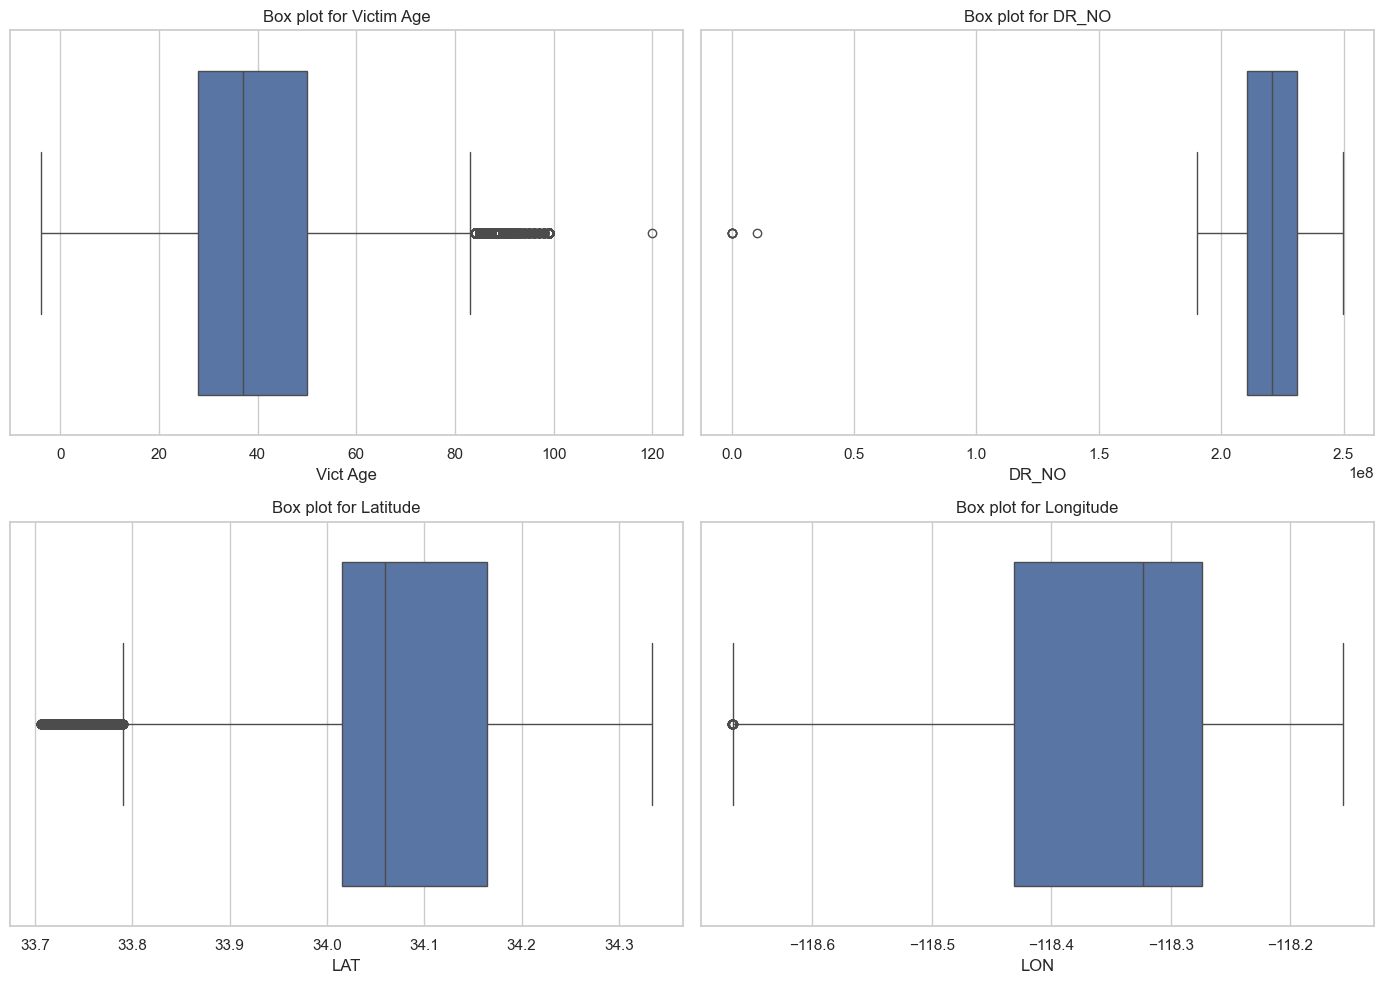

In [9]:
#Task 3.4 Deal with outliers if relevant to your analysis.

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
sns.boxplot(x=df_crime['Vict Age'], ax=axes[0, 0])
axes[0, 0].set_title('Box plot for Victim Age')
sns.boxplot(x=df_crime['DR_NO'], ax=axes[0, 1])
axes[0, 1].set_title('Box plot for DR_NO')
sns.boxplot(x=df_crime['LAT'], ax=axes[1, 0])
axes[1, 0].set_title('Box plot for Latitude')
sns.boxplot(x=df_crime['LON'], ax=axes[1, 1])
axes[1, 1].set_title('Box plot for Longitude')
plt.tight_layout()
plt.show()

In [10]:
#Task 3.4 - Deal with outliers if relevant to your analysis
# Replace 'Vict Age' less than or equal to 0 with NaN values to remove outliers

df_crime['Vict Age'] = np.where(df_crime['Vict Age'] <= 0, np.nan, df_crime['Vict Age'])

df_crime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,2020-03-01,2020-03-01,21:30,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2020-02-09,2020-02-08,18:00,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,2020-11-11,2020-11-04,17:00,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,2023-05-10,2020-03-10,20:37,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,2022-08-18,2020-08-17,12:00,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982633,242011172,2024-08-20,2024-08-17,23:00,20,Olympic,2033,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,3700 WILSHIRE BL,NaN,34.0617,-118.3066
982634,240710284,2024-07-24,2024-07-23,14:00,7,Wilshire,788,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,4000 W 23RD ST,NaN,34.0362,-118.3284
982635,240104953,2024-01-15,2024-01-15,01:00,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460
982636,240309674,2024-04-24,2024-04-24,15:00,3,Southwest,358,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,FLOWER ST,JEFFERSON BL,34.0215,-118.2868


In [11]:
#Task 3.5 - Standardize or normalize numerical data as necessary.

num_clm = ['Vict Age', 'Rpt Dist No', 'Part 1-2', 'Premis Cd', 'LAT', 'LON']
# Standardization
scaler = StandardScaler()
df_crime[num_clm] = scaler.fit_transform(df_crime[num_clm])

# Normalization
scaler = MinMaxScaler()
df_crime[num_clm] = scaler.fit_transform(df_crime[num_clm])

df_crime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,2020-03-01,2020-03-01,21:30,7,Wilshire,0.325548,0.0,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,0.527689,0.618899
1,200106753,2020-02-09,2020-02-08,18:00,1,Central,0.038608,0.0,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,0.538670,0.790316
2,200320258,2020-11-11,2020-11-04,17:00,3,Southwest,0.121544,0.0,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,0.501432,0.717298
3,200907217,2023-05-10,2020-03-10,20:37,9,Van Nuys,0.411344,0.0,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,0.718810,0.446896
4,220614831,2022-08-18,2020-08-17,12:00,6,Hollywood,0.269304,1.0,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,0.618237,0.663608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982633,242011172,2024-08-20,2024-08-17,23:00,20,Olympic,0.920877,0.0,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,3700 WILSHIRE BL,NaN,0.566200,0.704803
982634,240710284,2024-07-24,2024-07-23,14:00,7,Wilshire,0.327455,0.0,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,4000 W 23RD ST,NaN,0.525621,0.662241
982635,240104953,2024-01-15,2024-01-15,01:00,1,Central,0.000000,1.0,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,0.577021,0.823116
982636,240309674,2024-04-24,2024-04-24,15:00,3,Southwest,0.122498,0.0,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,FLOWER ST,JEFFERSON BL,0.502228,0.743460


In [12]:
#Task 3.6 - Encode categorical data if present.
#There is no categorical data that required encoding.

4.Exploratory Data Analysis (EDA)

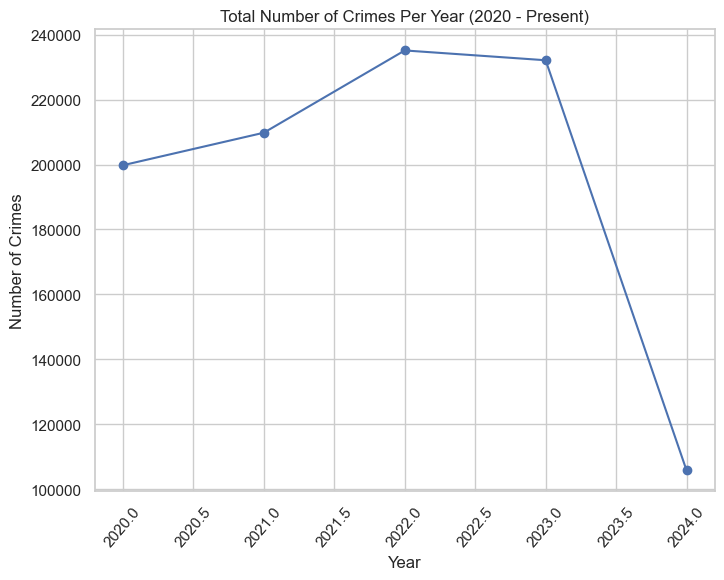

In [13]:
#Task 4.1 - Visualize overall crime trends from 2020 to the present year

df_crime['year'] = pd.to_datetime(df_crime['DATE OCC']).dt.year
crime_per_year = df_crime.groupby('year').size()

plt.figure(figsize=(8,6))
plt.plot(crime_per_year.index, crime_per_year.values, marker='o')
plt.title('Total Number of Crimes Per Year (2020 - Present)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=50)
plt.grid(True)
plt.show()

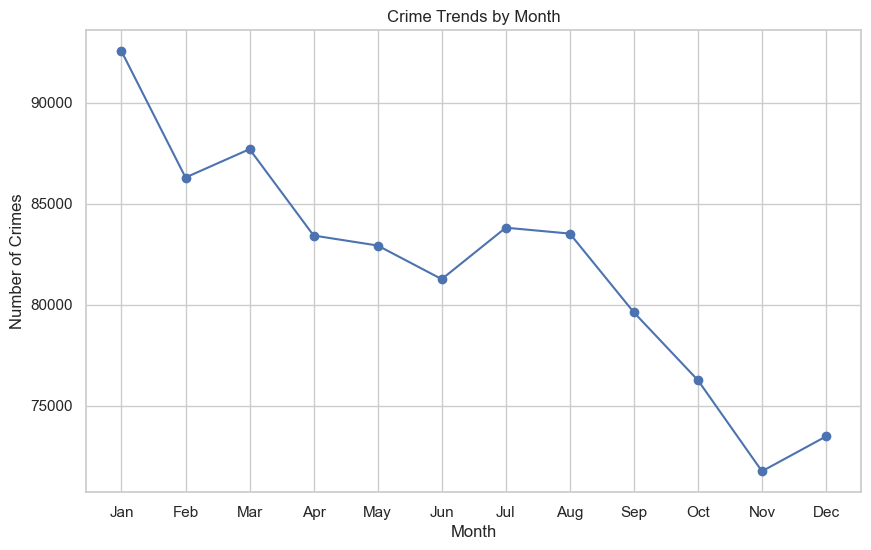

In [14]:
#Task 4.2 - Analyze and visualize seasonal patterns in crime data.

df_crime['month'] = pd.to_datetime(df_crime['DATE OCC']).dt.month
crime_by_month = df_crime.groupby('month').size()

plt.figure(figsize=(10,6))
crime_by_month.plot(kind='line', marker='o')
plt.title('Crime Trends by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Crm Cd Desc
VEHICLE - STOLEN                                           110804
BATTERY - SIMPLE ASSAULT                                    74688
BURGLARY FROM VEHICLE                                       61324
THEFT OF IDENTITY                                           60867
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     59639
BURGLARY                                                    57743
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              53395
THEFT PLAIN - PETTY ($950 & UNDER)                          51384
INTIMATE PARTNER - SIMPLE ASSAULT                           46696
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             39550
Name: count, dtype: int64


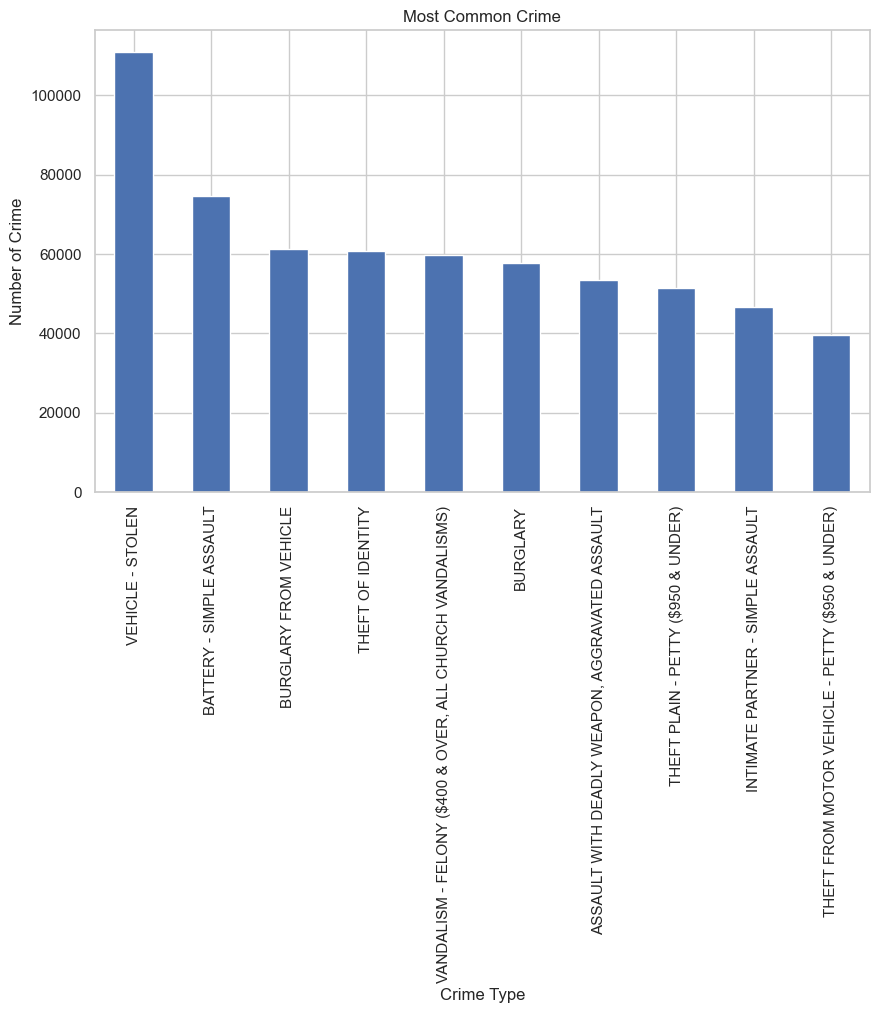

In [15]:
#Task 4.3 - Identify the most common type of crime and its trends over time.

most_common_crime = df_crime['Crm Cd Desc'].value_counts().head(10)
print(most_common_crime)
plt.figure(figsize=(10, 6))
most_common_crime.plot(kind='bar')
plt.title("Most Common Crime")
plt.xlabel("Crime Type")
plt.ylabel("Number of Crime")
plt.show()


Most common crime type: VEHICLE - STOLEN


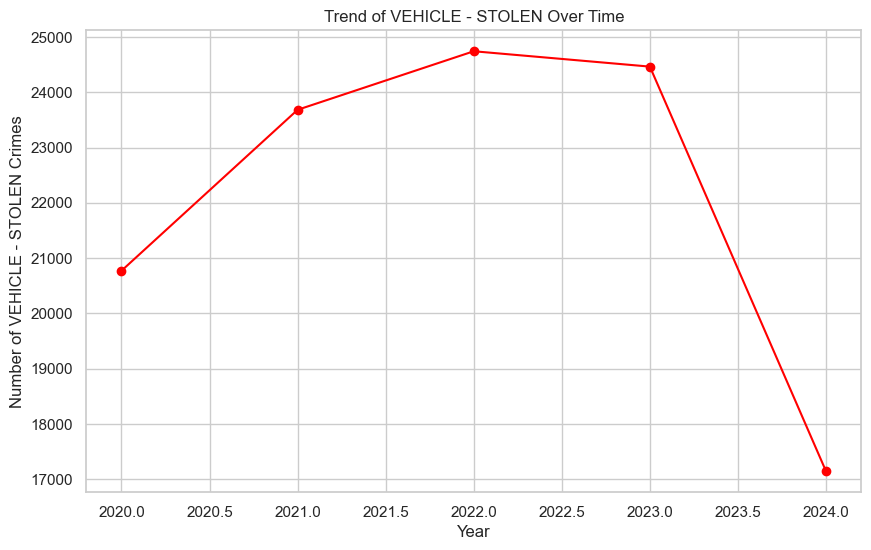

In [16]:
#Task 4.3 - Identify the most common type of crime and its trends over time.
crime_type_counts = df_crime['Crm Cd Desc'].value_counts().head(10)
most_common_crime = crime_type_counts.idxmax()
print(f"Most common crime type: {most_common_crime}")

most_common_crime_data = df_crime[df_crime['Crm Cd Desc'] == most_common_crime]

df_crime['year'] = pd.to_datetime(df_crime['DATE OCC']).dt.year
crime_trend_by_year = most_common_crime_data.groupby('year').size()

plt.figure(figsize=(10, 6))
crime_trend_by_year.plot(kind='line', marker='o', color='red')
plt.title(f'Trend of {most_common_crime} Over Time')
plt.xlabel('Year')
plt.ylabel(f'Number of {most_common_crime} Crimes')
plt.grid(True)
plt.show()

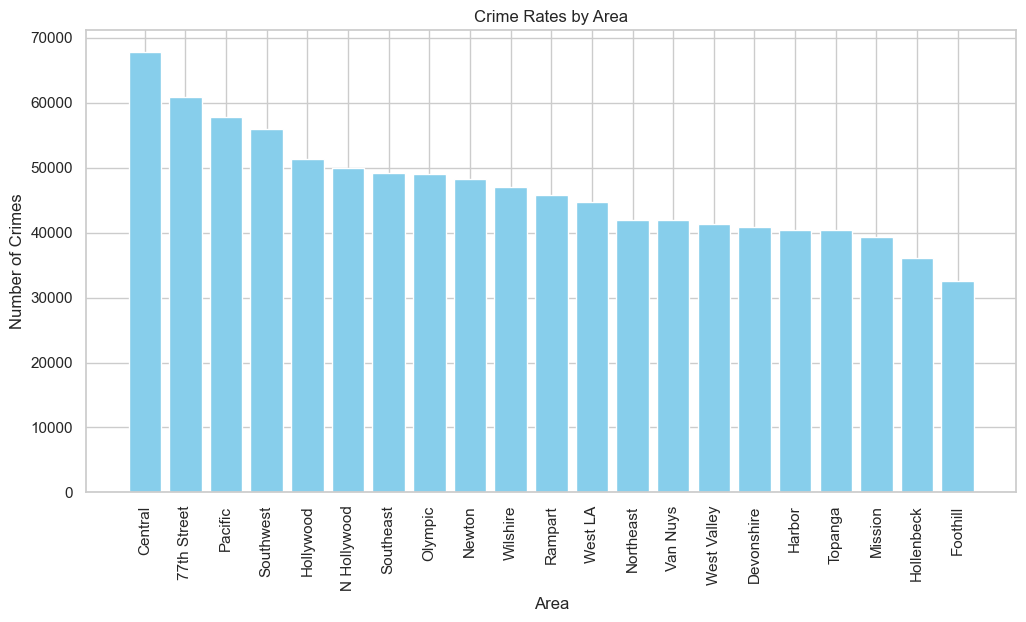

In [17]:
#Task 4.4 - Investigate if there are any notable differences in crime rates between regions or cities
#By Area
crime_by_area = df_crime.groupby('AREA NAME').size().reset_index(name='Count').sort_values('Count', ascending = False)

plt.figure(figsize=(12, 6))
plt.bar(crime_by_area['AREA NAME'], crime_by_area['Count'], color='skyblue')
plt.title('Crime Rates by Area')
plt.xlabel('Area')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()

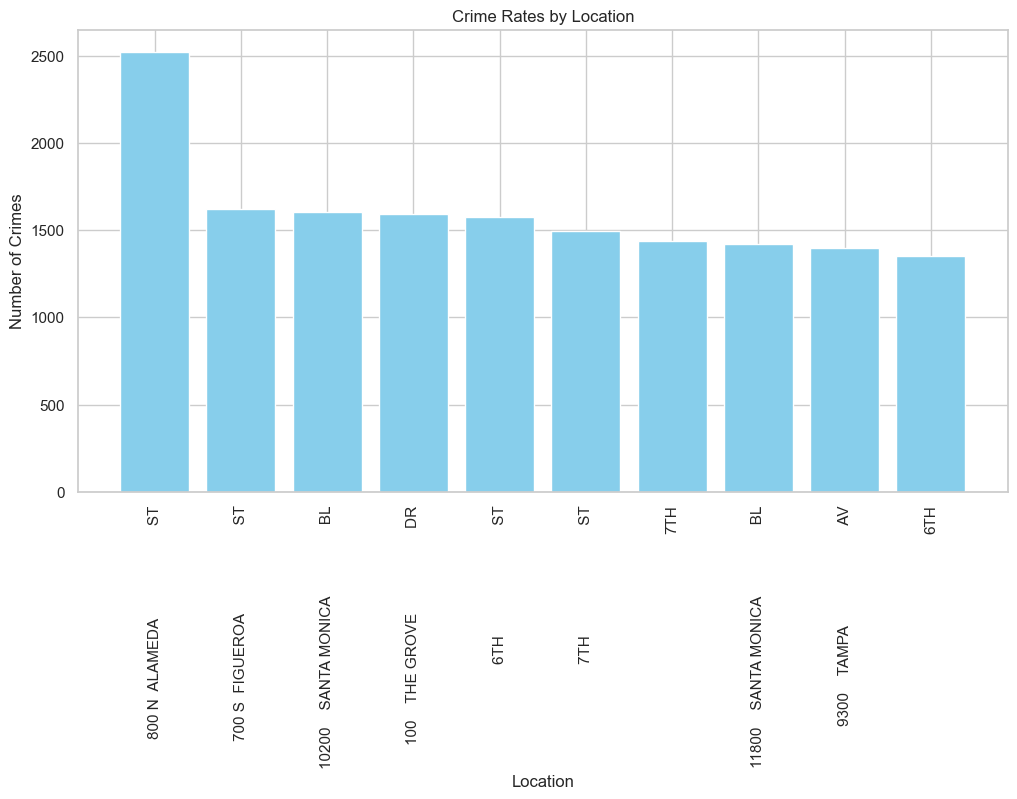

In [18]:
#Task 4.4 - Investigate if there are any notable differences in crime rates between regions or cities
#By Location
crime_by_loc = df_crime.groupby('LOCATION').size().reset_index(name='Count').sort_values('Count', ascending = False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(crime_by_loc['LOCATION'], crime_by_loc['Count'], color='skyblue')
plt.title('Crime Rates by Location')
plt.xlabel('Location')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()

In [19]:
#Task 4.5 - Explore correlations between economic factors (if available) and crime rates
#Cannot be visualized since economic data is not avaliable.

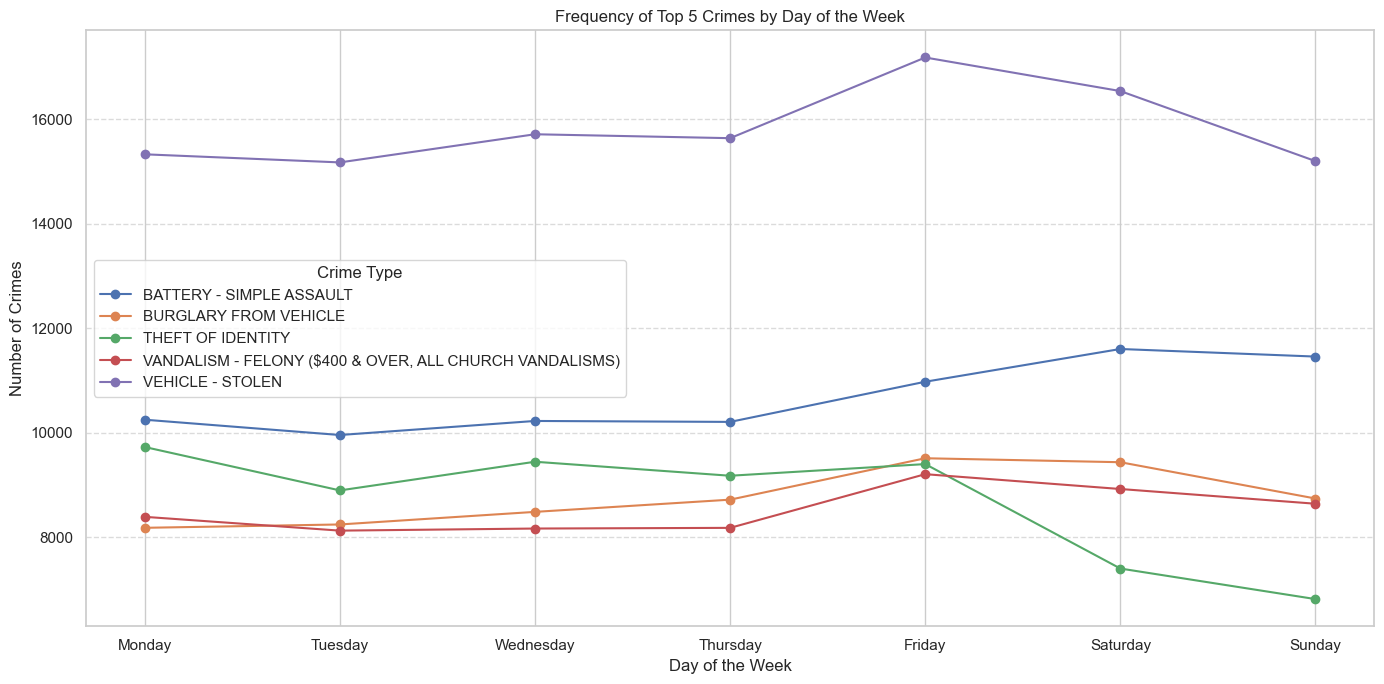

In [20]:
#Task 4.6 - Analyze the relationship between the day of the week and the frequency of certain types of crimes.

df_crime['Day of Week'] = pd.to_datetime(df_crime['DATE OCC']).dt.day_name()
top_5_crimes = df_crime['Crm Cd Desc'].value_counts().head(5).index.tolist()
top_5_crime_data = df_crime[df_crime['Crm Cd Desc'].isin(top_5_crimes)]
top_5_crime_by_day = top_5_crime_data.groupby(['Day of Week', 'Crm Cd Desc']).size().reset_index(name='Count')
top_5_crime_by_day_pivot = top_5_crime_by_day.pivot(index='Day of Week', columns='Crm Cd Desc', values='Count')
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
top_5_crime_by_day_pivot = top_5_crime_by_day_pivot.loc[ordered_days]

top_5_crime_by_day_pivot.plot(kind='line', marker='o', figsize=(14, 7))
plt.title('Frequency of Top 5 Crimes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title='Crime Type')
plt.show()

01:05:37 - cmdstanpy - INFO - Chain [1] start processing
01:05:37 - cmdstanpy - INFO - Chain [1] done processing


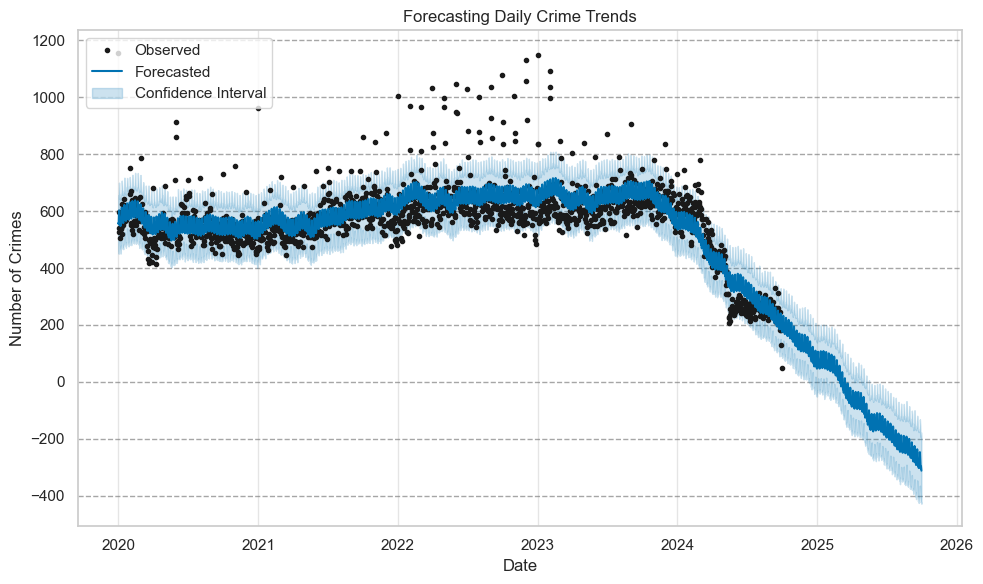

In [21]:
#Task 5 - a) Advanced Analysis
#Use predictive modeling techniques (e.g., time series forecasting) to predict future crime trends
df_crime['DATE OCC'] = pd.to_datetime(df_crime['DATE OCC'])
daily_crimes = df_crime.resample('D', on='DATE OCC').size().reset_index(name='Count')
daily_crimes.columns = ['ds', 'y']
# Fitting the Prophet model
model = Prophet()
model.fit(daily_crimes)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.title('Forecasting Daily Crime Trends')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.legend(['Observed', 'Forecasted', 'Confidence Interval'], loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()